In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# x is the data, t is the label
# In t, 0 is '3' and 1 is '5'
with np.load("TINY_MNIST.npz") as data:
    x, t = data["x"], data["t"]
    x_eval, t_eval = data["x_eval"], data["t_eval"]
    

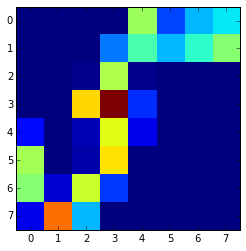

In [3]:
# Just plotting to see what the images look like
temp = np.copy(x_eval[0])
temp = temp.reshape(8,8)
plt.imshow(temp, interpolation='nearest')

In [4]:
# Alg for kNN
def sq_err(img, train_set, train_label):
    ans_list = []
    for i in range(train_set.shape[0]):
        delta = img - train_set[i]
        sq_err = delta.dot(delta.T)
        ans_list.append((sq_err, train_label[i,0]))
    sorted_ = sorted(ans_list, key=lambda tup: tup[0])
    return sorted_

import itertools
import operator

def most_common(L):
    SL = sorted((x, i) for i, x in enumerate(L))
    groups = itertools.groupby(SL, key=operator.itemgetter(0))
    def _auxfun(g):
        item, iterable = g
        count = 0
        min_index = len(L)
        for _, where in iterable:
            count += 1
            min_index = min(min_index, where)
        return count, -min_index
    return max(groups, key=_auxfun)[0]

def kNN(img, train_set, train_label, k):
    ans_list = sq_err(img, train_set, train_label)
    count = []
    for i in range(k):
        count.append(ans_list[i][1])
    return most_common(count)


Results iterating over N
[[  5 107]
 [ 50  40]
 [100  27]
 [200  17]
 [400   9]
 [800  12]]


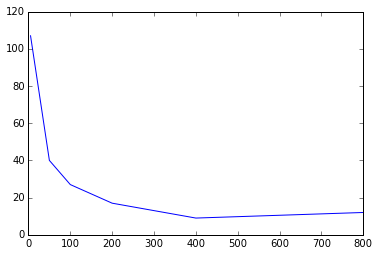


Results iterating over K
[[  1  12]
 [  3   8]
 [  5  10]
 [  7   9]
 [ 21  11]
 [101  24]
 [401  51]]


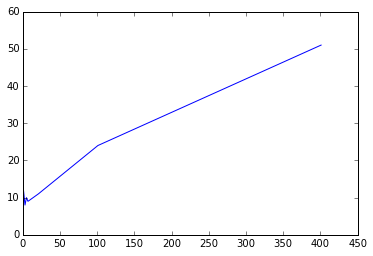

In [5]:
# Task 1 and 2 - Running things
def part3_run(N=5, k=1):
    num_err = 0
    for i in range(x_eval.shape[0]):
        label = kNN(x_eval[i], x[0:N], t, k)
        if label != t_eval[i]:
            num_err += 1
    return num_err

def task1():
    N_list = [5, 50, 100, 200, 400, 800]
    err_list = []
    for N_ in N_list:
        err_list.append(part3_run(N=N_))
    print np.column_stack((N_list, err_list))
    plt.plot(N_list, err_list)
    plt.show()

def task2():
    k_list = [1, 3, 5, 7, 21, 101, 401]
    err_list = []
    for k_ in k_list:
        err_list.append(part3_run(N=800, k=k_))
    print np.column_stack((k_list, err_list))
    plt.plot(k_list, err_list)

print "Results iterating over N"
task1()

print ""
print "Results iterating over K"
task2()

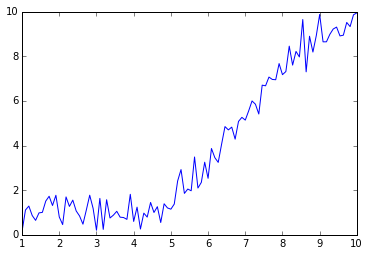

In [6]:
# Just plotting the function

train_x = np.linspace(1.0, 10.0, num=100)[:, np. newaxis]
train_y = np.sin(train_x) + 0.1*np.power(train_x, 2) + 0.5*np.random.randn(100, 1)
plt.plot(train_x, train_y)

190436.788416


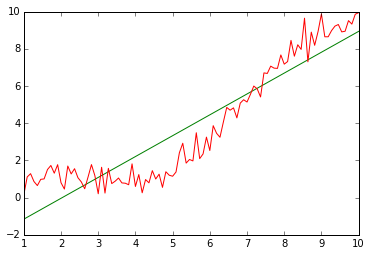

In [7]:
# Task 3 - Gradient descent
x = np.copy(train_x)
y = np.copy(train_y)

w = np.random.rand(2)
x = np.column_stack((np.ones(x.shape[0]), x))

for i in range(1000):
    y_estimate = x.dot(w)
    y_estimate = y_estimate.reshape(y_estimate.shape[0], 1)
    delta = y - y_estimate
    w[0], w[1] = w[0] + 0.0002*np.sum(delta * x[:,0].reshape(x.shape[0], 1)), w[1] + 0.0002*np.sum(delta * x[:,1].reshape(x.shape[0], 1))

y_estimate = x.dot(w)
plt.plot(x, y_estimate, train_x, train_y)
delta = y - y_estimate
print np.sum(np.power(delta, 2))

154.880468591


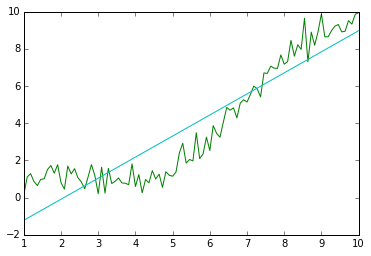

In [8]:
# Task 3 - Exact solution
from numpy.linalg import inv

w = inv(np.matrix(x.T)*np.matrix(x)) * (np.matrix(x.T) * np.matrix(y))
y_estimate = x.dot(w)
plt.plot(x, y, x, y_estimate)
delta = y - y_estimate
print np.sum(np.power(delta, 2))

20.8052291322


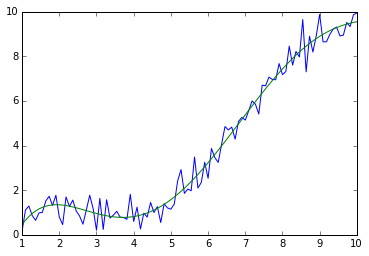

In [9]:
# Task 4
x = np.copy(train_x)
y = np.copy(train_y)

w = np.random.rand(6)
x = np.column_stack((np.ones(x.shape[0]), x))
for i in range(2, 6):
    x = np.column_stack((x, np.power(x[:,1], i)))

w = inv(np.matrix(x.T)*np.matrix(x)) * (np.matrix(x.T) * np.matrix(y))
y_estimate = x.dot(w)
plt.plot(train_x, y, train_x, y_estimate)
delta = y - y_estimate
print np.sum(np.power(delta, 2))

In [10]:
with np.load("TINY_MNIST.npz") as data:
    x, t = data["x"], data["t"]
    x_eval, t_eval = data["x_eval"], data["t_eval"]

In [11]:
# Task 5
# Assume minibatach of size 10

# one loop
def grad_desc(x, t, w, minibatch_size, lamb=0, repeats=2000):
    w_result = np.zeros(w.shape[0])
    random_list = []
    for repeat in range(repeats):
        # generate minibatch
        random_batch = np.random.randint(x.shape[0], size=minibatch_size)
        random_list = np.concatenate((random_list, random_batch))
        x_copy = np.copy(x)
        t_copy = np.copy(t)
        x_copy = x_copy[random_batch]
        t_copy = t_copy[random_batch]
        
        # actual calculations
        y_estimate = x_copy.dot(w)
        y_estimate = y_estimate.reshape(y_estimate.shape[0], 1)
        delta = y_estimate - t_copy

        derivatives = np.zeros(w.shape[0])
        for j in range(w.shape[0]):
            derivatives[j] = np.sum(delta * x_copy[:,j].reshape(x_copy.shape[0], 1)) + lamb*w[j]
        for j in range(w.shape[0]):
            w[j] -= 0.01*derivatives[j]
            
        w_result += w
        
    w[:] = np.copy(w_result)
    w /= repeats
    return np.unique(random_list)

def task5():
    N_list = [100, 200, 400, 800]
    err_list = []
    minibatch_size = 10
    for N in N_list:
        x_copy = np.copy(x)
        x_copy = x_copy[0:N]
        t_copy = np.copy(t)
        t_copy = t_copy[0:N]
        
        # initialize w, since x is 64-D need +1 to make x0 = 1
        x_copy = np.column_stack((np.ones(x_copy.shape[0]), x_copy))
        w = np.random.rand(x_copy.shape[1])

        grad_desc(x_copy, t_copy, w, minibatch_size)
        
        x_eval_copy = np.copy(x_eval)
        x_eval_copy = np.column_stack((np.ones(x_eval_copy.shape[0]), x_eval_copy))
        y_estimate = x_eval_copy.dot(w)

        y_round = [0 if num < 0.5 else 1 for num in y_estimate]
        y_round = np.array(y_round)
        y_round = y_round.reshape((t_eval.shape[0], 1))
        
        err_list.append(np.sum(np.abs(t_eval - y_round)))
        
    print np.column_stack((N_list, err_list))
        
task5()

[[ 100.   39.]
 [ 200.   40.]
 [ 400.   40.]
 [ 800.   45.]]


[[    1.   200.     4.]
 [   10.   212.    20.]
 [   50.   146.    14.]
 [  100.   148.    12.]
 [  500.   111.     2.]
 [ 1000.    90.     1.]
 [ 5000.    68.     0.]]


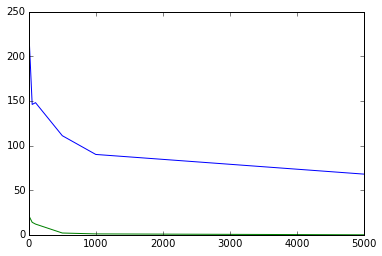

In [12]:
def task6():
    repeat_list = [1, 10, 50, 100, 500, 1000, 5000]
    err_list = []
    train_err_list = []
    minibatch_size = 10
    for R in repeat_list:
        x_copy = np.copy(x)
        x_copy = x_copy[0:50]
        t_copy = np.copy(t)
        t_copy = t_copy[0:50]
        
        # initialize w, since x is 64-D need +1 to make x0 = 1
        x_copy = np.column_stack((np.ones(x_copy.shape[0]), x_copy))
        w = np.random.rand(x_copy.shape[1])

        train_list = grad_desc(x_copy, t_copy, w, minibatch_size, repeats=R)
        
        # validation set
        x_eval_copy = np.copy(x_eval)
        x_eval_copy = np.column_stack((np.ones(x_eval_copy.shape[0]), x_eval_copy))
        y_estimate = x_eval_copy.dot(w)

        y_round = [0 if num < 0.5 else 1 for num in y_estimate]
        y_round = np.array(y_round)
        y_round = y_round.reshape((t_eval.shape[0], 1))
        
        err_list.append(np.sum(np.abs(t_eval - y_round)))
        
        # training set
        train_list = train_list.astype(int)
        x_tra = x_copy[train_list]
        y_estimate_tra = x_tra.dot(w)
        y_round_tra = [0 if num < 0.5 else 1 for num in y_estimate_tra]
        y_round_tra = np.array(y_round_tra)
        y_round_tra = y_round_tra.reshape((t_copy[train_list].shape[0], 1))
        train_err_list.append(np.sum(np.abs(t_copy[train_list] - y_round_tra)))

    np.set_printoptions(suppress=True)
    print np.column_stack((repeat_list, err_list, train_err_list))
    plt.plot(repeat_list, err_list, repeat_list, train_err_list)
    
task6()

In [13]:
def task7():
    lamb_list = [0, 0.0001, 0.001, 0.01, 0.1, 0.5]
    err_list = []
    train_err_list = []
    minibatch_size = 10
    for lamb in lamb_list:
        x_copy = np.copy(x)
        x_copy = x_copy[0:50]
        t_copy = np.copy(t)
        t_copy = t_copy[0:50]
        
        # initialize w, since x is 64-D need +1 to make x0 = 1
        x_copy = np.column_stack((np.ones(x_copy.shape[0]), x_copy))
        w = np.random.rand(x_copy.shape[1])
        
        train_list = grad_desc(x_copy, t_copy, w, minibatch_size, lamb=lamb, repeats=1000)
        
        # validation set
        x_eval_copy = np.copy(x_eval)
        x_eval_copy = np.column_stack((np.ones(x_eval_copy.shape[0]), x_eval_copy))
        y_estimate = x_eval_copy.dot(w)

        y_round = [0 if num < 0.5 else 1 for num in y_estimate]
        y_round = np.array(y_round)
        y_round = y_round.reshape((t_eval.shape[0], 1))
        
        err_list.append(np.sum(np.abs(t_eval - y_round)))
        
        """
        # training set
        train_list = train_list.astype(int)
        x_tra = x_copy[train_list]
        y_estimate_tra = x_tra.dot(w)
        y_round_tra = [0 if num < 0.5 else 1 for num in y_estimate_tra]
        y_round_tra = np.array(y_round_tra)
        y_round_tra = y_round_tra.reshape((t_copy[train_list].shape[0], 1))
        train_err_list.append(np.sum(np.abs(t_copy[train_list] - y_round_tra)))
        """
        
    print np.column_stack((lamb_list, err_list))
    
task7()

[[  0.      75.    ]
 [  0.0001  80.    ]
 [  0.001   86.    ]
 [  0.01    85.    ]
 [  0.1     73.    ]
 [  0.5     53.    ]]
